In [1]:
#importing the necessary libraries that we use them in the later steps.
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from scipy.stats import zscore

In [2]:
#reading the dataset and printing it.
data = pd.read_csv('/Users/anvesh/Downloads/customer_test_data.csv')

data

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038 Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,Caucasian,Jr.,White,9/15/1997
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910 Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,Hispanic,DDS,Hispanic,3/11/1997
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456 Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,Hispanic,DDS,Asian,10/12/1976
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400 Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,Asian,II,White,5/16/1997
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421 Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,Caucasian,MD,Black,12/22/1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,3597 Alexandria Wall Suite 720,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,Caucasian,DDS,Asian,8/9/2004
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,48817 Carroll River,South Tina,56063,North Dakota,7516268200,1173212553,African American,PhD,Black,9/25/1976
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,958 Philip Haven,East Erinmouth,26108,Massachusetts,9109645850,7082160298,Caucasian,MD,Black,8/25/2005
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,564 Sharon Glens Apt. 442,Darrellland,38660,Montana,1546761019,4375132320,Asian,Jr.,Hispanic,3/5/1981


In [3]:
#printing the data shape
data.shape

(100000, 16)

In [4]:
#printing the datatypes
data.dtypes

first_name                object
last_name                 object
middle_name               object
email                     object
phone                      int64
department                object
mailing_address_street    object
mailing_address_city      object
mailing_address_zip        int64
mailing_state             object
home_phone                 int64
work_phone                 int64
race                      object
suffix                    object
ethinicity                object
dob                       object
dtype: object

In [5]:
#printing the first few rows 
data.head()

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038 Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,Caucasian,Jr.,White,9/15/1997
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910 Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,Hispanic,DDS,Hispanic,3/11/1997
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456 Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,Hispanic,DDS,Asian,10/12/1976
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400 Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,Asian,II,White,5/16/1997
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421 Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,Caucasian,MD,Black,12/22/1958


In [6]:
#printing last few rows.
data.tail()

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,3597 Alexandria Wall Suite 720,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,Caucasian,DDS,Asian,8/9/2004
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,48817 Carroll River,South Tina,56063,North Dakota,7516268200,1173212553,African American,PhD,Black,9/25/1976
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,958 Philip Haven,East Erinmouth,26108,Massachusetts,9109645850,7082160298,Caucasian,MD,Black,8/25/2005
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,564 Sharon Glens Apt. 442,Darrellland,38660,Montana,1546761019,4375132320,Asian,Jr.,Hispanic,3/5/1981
99999,Lisa,Rice,Sarah,lisa.rice@gmail.com,8484101191,Finance,34392 James Glens Suite 883,Port Brandibury,74541,Ohio,9355960590,8152376330,Asian,DDS,Hispanic,1/22/1960


In [7]:
#displaying the standard measuring methods for uncertainity
data.describe()

,phone,mailing_address_zip,home_phone,work_phone
count,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05
mean,5.514001e+09,50234.269970,5.491341e+09,5.507097e+09
std,2.595688e+09,28714.677071,2.597129e+09,2.598203e+09
min,1.000051e+09,501.000000,1.000288e+09,1.000066e+09
25%,3.273707e+09,25363.000000,3.243711e+09,3.264291e+09
50%,5.511397e+09,50235.000000,5.490181e+09,5.504936e+09
75%,7.762057e+09,75164.000000,7.747745e+09,7.760077e+09
max,9.999865e+09,99950.000000,9.999988e+09,9.999817e+09


In [8]:
#displaying basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   first_name              100000 non-null  object
 1   last_name               100000 non-null  object
 2   middle_name             100000 non-null  object
 3   email                   100000 non-null  object
 4   phone                   100000 non-null  int64 
 5   department              100000 non-null  object
 6   mailing_address_street  100000 non-null  object
 7   mailing_address_city    100000 non-null  object
 8   mailing_address_zip     100000 non-null  int64 
 9   mailing_state           100000 non-null  object
 10  home_phone              100000 non-null  int64 
 11  work_phone              100000 non-null  int64 
 12  race                    100000 non-null  object
 13  suffix                  100000 non-null  object
 14  ethinicity              100000 non-nu

In [9]:
#displaying the columns
data.columns

Index(['first_name', 'last_name', 'middle_name', 'email', 'phone',
       'department', 'mailing_address_street', 'mailing_address_city',
       'mailing_address_zip', 'mailing_state', 'home_phone', 'work_phone',
       'race', 'suffix', 'ethinicity', 'dob'],
      dtype='object')

Unique values for race: ['Caucasian' 'Hispanic' 'Asian' 'African American']
Unique values for ethinicity: ['White' 'Hispanic' 'Asian' 'Black']
Unique values for department: ['Finance' 'IT' 'HR' 'Marketing' 'Sales']


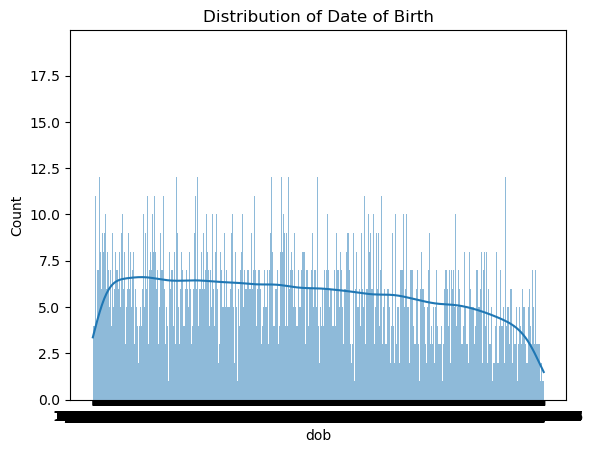

In [10]:
#displaying the unique values and counts
for column in ['race', 'ethinicity', 'department']:
    print(f"Unique values for {column}: {data[column].unique()}")
    
#visualising the numerical data
sns.histplot(data['dob'], kde=True)
plt.title('Distribution of Date of Birth')
plt.show()

In [11]:
#printing the missing values
data.isna()

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#displaying the no. of missing values
data.isna().sum()

first_name                0
last_name                 0
middle_name               0
email                     0
phone                     0
department                0
mailing_address_street    0
mailing_address_city      0
mailing_address_zip       0
mailing_state             0
home_phone                0
work_phone                0
race                      0
suffix                    0
ethinicity                0
dob                       0
dtype: int64

In [13]:
#displaying the duplicate values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [14]:
#cleaning and validating the data
df_cleaned = data.dropna(subset=['dob', 'race'])

df_cleaned = df_cleaned.drop_duplicates()

df_cleaned['email'] = df_cleaned['email'].str.lower()

df_cleaned['phone'] = df_cleaned['phone'].astype(str).str.replace('[^0-9]', '', regex=True)

df_cleaned['race'] = df_cleaned['race'].str.lower()

df_cleaned.head()

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038 Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910 Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456 Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400 Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421 Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958


Missing Percentage:
 first_name                0.0
last_name                 0.0
middle_name               0.0
email                     0.0
phone                     0.0
department                0.0
mailing_address_street    0.0
mailing_address_city      0.0
mailing_address_zip       0.0
mailing_state             0.0
home_phone                0.0
work_phone                0.0
race                      0.0
suffix                    0.0
ethinicity                0.0
dob                       0.0
dtype: float64


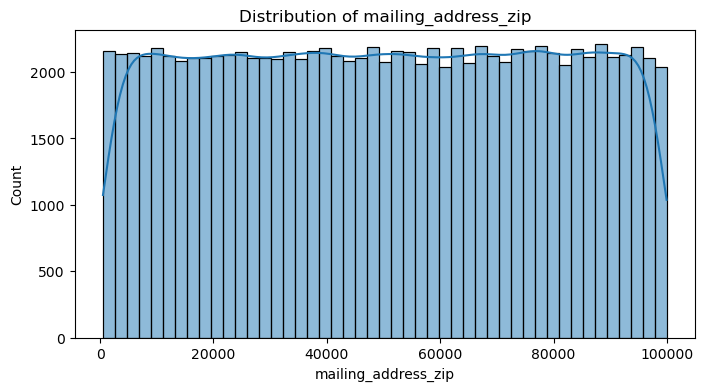

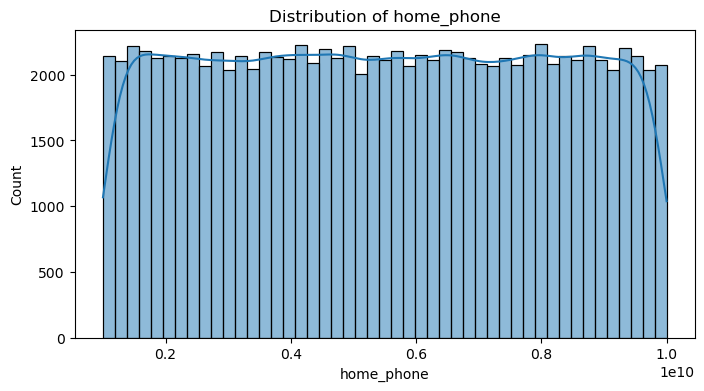

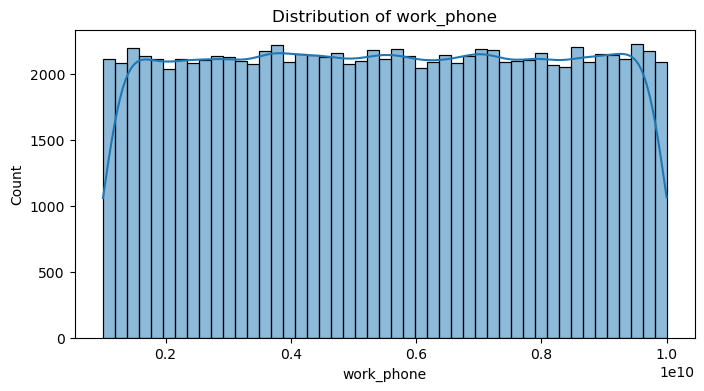

Unique values for mailing_address_zip:
[24529 99427 17224 ... 18680 56063 26108]
Unique values for home_phone:
[7322949289 6701377418 9015840907 ... 9109645850 1546761019 9355960590]
Unique values for work_phone:
[7177534172 3132747726 5884119691 ... 7082160298 4375132320 8152376330]


In [15]:
#displaying the missing values percentage
missing_percentage = df_cleaned.isnull().mean() * 100
print("Missing Percentage:\n", missing_percentage)

#exploring the numerical values and plotting them
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

#identifying and handling the outliers by evaluating the Z-scores.
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    print(f"Unique values for {column}:\n{df_cleaned[column].unique()}")


z_scores = np.abs(zscore(df_cleaned[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
df_no_outliers = df_cleaned[~outliers]

In [16]:
#printing the outliers.
df_no_outliers.head()

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038 Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910 Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456 Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400 Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421 Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958


In [17]:
#printing the z-scores
z_scores

,mailing_address_zip,home_phone,work_phone
0,0.895201,0.705247,0.642924
1,1.713165,0.465915,0.913848
2,1.149601,1.357082,0.145110
3,0.232904,0.494155,0.165476
4,1.508549,0.077882,1.638515
...,...,...,...
99995,1.522966,0.422179,0.383921
99996,0.202989,0.779683,1.668040
99997,0.840211,1.393201,0.606216
99998,0.403081,1.518831,0.435674


In [18]:
#defining some somple data from original data
sample_size = 20  
sample_df = data.sample(n=sample_size, random_state=42)

In [19]:
#evaluating the sample using chi-squared test
contingency_table = pd.crosstab(sample_df['first_name'], [sample_df['last_name'], sample_df['middle_name'], sample_df['email']])
chi2, p, _, expected = chi2_contingency(contingency_table)
print(f'Chi-squared value: {chi2}')
print(f'P-value: {p}')

Chi-squared value: 360.0
P-value: 0.2413662035364561


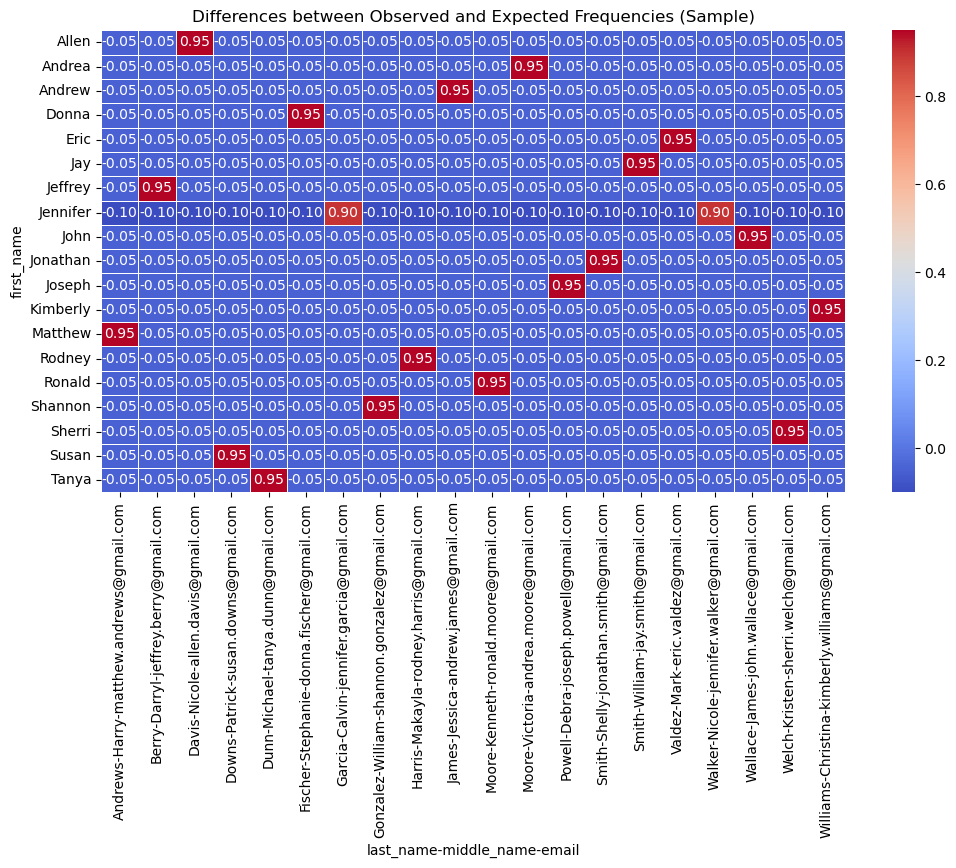

In [20]:
#evaluating the difference between observed and expected values
differences = contingency_table - expected

# Visualize differences using a heatmap with Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(differences, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Differences between Observed and Expected Frequencies (Sample)')
plt.show()

In [21]:
#evaluating the entropy
freq = data.value_counts()

data_prob = freq/len(df_cleaned)

entropy = entropy(data_prob, base=2)

In [22]:
#printing entropy value
print(f"Entropy: {entropy}")

Entropy: 16.609640474436805


In [23]:
#The feature mailing_address_street had been splitting into room_no. and mailing_add_street, then those features was displayed as two new features added in the dataset.
col_split = 'mailing_address_street'
df_cleaned[['room_no.', 'mailing_add_street']] = df_cleaned[col_split].apply(lambda x: pd.Series(str(x).split(' ', 1) if ' ' in str(x) else [str(x), None]))

df_cleaned

,first_name,last_name,middle_name,email,phone,department,mailing_address_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob,room_no.,mailing_add_street
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038 Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997,038,Lee Rue Apt. 275
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910 Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997,57910,Hogan Island Suite 880
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456 Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976,456,Laurie Causeway Apt. 488
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400 Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997,0400,Kyle Field Apt. 777
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421 Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958,421,Bailey Trail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,3597 Alexandria Wall Suite 720,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,caucasian,DDS,Asian,8/9/2004,3597,Alexandria Wall Suite 720
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,48817 Carroll River,South Tina,56063,North Dakota,7516268200,1173212553,african american,PhD,Black,9/25/1976,48817,Carroll River
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,958 Philip Haven,East Erinmouth,26108,Massachusetts,9109645850,7082160298,caucasian,MD,Black,8/25/2005,958,Philip Haven
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,564 Sharon Glens Apt. 442,Darrellland,38660,Montana,1546761019,4375132320,asian,Jr.,Hispanic,3/5/1981,564,Sharon Glens Apt. 442


In [24]:
#removing the mailing_address_street feature from the main dataset 
df_cleaned = df_cleaned.drop('mailing_address_street', axis=1)
df_cleaned

,first_name,last_name,middle_name,email,phone,department,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob,room_no.,mailing_add_street
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997,038,Lee Rue Apt. 275
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997,57910,Hogan Island Suite 880
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976,456,Laurie Causeway Apt. 488
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997,0400,Kyle Field Apt. 777
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958,421,Bailey Trail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,caucasian,DDS,Asian,8/9/2004,3597,Alexandria Wall Suite 720
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,South Tina,56063,North Dakota,7516268200,1173212553,african american,PhD,Black,9/25/1976,48817,Carroll River
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,East Erinmouth,26108,Massachusetts,9109645850,7082160298,caucasian,MD,Black,8/25/2005,958,Philip Haven
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,Darrellland,38660,Montana,1546761019,4375132320,asian,Jr.,Hispanic,3/5/1981,564,Sharon Glens Apt. 442


In [25]:
#moving the new features that was created in the previous steps to a certain position
last_col = df_cleaned.pop('room_no.')
df_cleaned.insert(6, 'room_no.', last_col)

df_cleaned

,first_name,last_name,middle_name,email,phone,department,room_no.,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob,mailing_add_street
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997,Lee Rue Apt. 275
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997,Hogan Island Suite 880
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976,Laurie Causeway Apt. 488
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997,Kyle Field Apt. 777
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958,Bailey Trail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,3597,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,caucasian,DDS,Asian,8/9/2004,Alexandria Wall Suite 720
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,48817,South Tina,56063,North Dakota,7516268200,1173212553,african american,PhD,Black,9/25/1976,Carroll River
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,958,East Erinmouth,26108,Massachusetts,9109645850,7082160298,caucasian,MD,Black,8/25/2005,Philip Haven
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,564,Darrellland,38660,Montana,1546761019,4375132320,asian,Jr.,Hispanic,3/5/1981,Sharon Glens Apt. 442


In [26]:
#moving the new features that was created in the previous steps to a certain position
last_col1 = df_cleaned.pop('mailing_add_street')
df_cleaned.insert(7, 'mailing_add_street', last_col1)

df_cleaned

,first_name,last_name,middle_name,email,phone,department,room_no.,mailing_add_street,mailing_address_city,mailing_address_zip,mailing_state,home_phone,work_phone,race,suffix,ethinicity,dob
0,Brandi,Pierce,Jennifer,brandi.pierce@gmail.com,4770598949,Finance,038,Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7322949289,7177534172,caucasian,Jr.,White,9/15/1997
1,Jason,Armstrong,Robert,jason.armstrong@gmail.com,2295131890,IT,57910,Hogan Island Suite 880,Rivasshire,99427,Indiana,6701377418,3132747726,hispanic,DDS,Hispanic,3/11/1997
2,Alexander,Morris,David,alexander.morris@gmail.com,6769216099,HR,456,Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,9015840907,5884119691,hispanic,DDS,Asian,10/12/1976
3,Brenda,Jones,Nicole,brenda.jones@gmail.com,5416059588,Marketing,0400,Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,6774718127,5077159509,asian,II,White,5/16/1997
4,Kristen,Patterson,Mackenzie,kristen.patterson@gmail.com,5433911194,HR,421,Bailey Trail,Mitchellville,6917,Minnesota,5693609034,9764270736,caucasian,MD,Black,12/22/1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,michelle.scott@gmail.com,6430003082,Sales,3597,Alexandria Wall Suite 720,North Ashleeport,6503,Pennsylvania,6587789070,4509596486,caucasian,DDS,Asian,8/9/2004
99996,Aaron,Santos,Andrew,aaron.santos@gmail.com,4969654361,Marketing,48817,Carroll River,South Tina,56063,North Dakota,7516268200,1173212553,african american,PhD,Black,9/25/1976
99997,Kimberly,White,Faith,kimberly.white@gmail.com,8885017558,HR,958,Philip Haven,East Erinmouth,26108,Massachusetts,9109645850,7082160298,caucasian,MD,Black,8/25/2005
99998,Carl,Powell,John,carl.powell@gmail.com,8860755815,HR,564,Sharon Glens Apt. 442,Darrellland,38660,Montana,1546761019,4375132320,asian,Jr.,Hispanic,3/5/1981


In [27]:
#selecting the specific features of main data to do the clustering model and form clusters using these specific features
features = ['first_name', 'last_name', 'middle_name', 'department', 'room_no.', 'mailing_add_street', 'mailing_address_city', 'mailing_address_zip', 'mailing_state','work_phone' ]

selected_features = df_cleaned[features].copy()

selected_features

,first_name,last_name,middle_name,department,room_no.,mailing_add_street,mailing_address_city,mailing_address_zip,mailing_state,work_phone
0,Brandi,Pierce,Jennifer,Finance,038,Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7177534172
1,Jason,Armstrong,Robert,IT,57910,Hogan Island Suite 880,Rivasshire,99427,Indiana,3132747726
2,Alexander,Morris,David,HR,456,Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,5884119691
3,Brenda,Jones,Nicole,Marketing,0400,Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,5077159509
4,Kristen,Patterson,Mackenzie,HR,421,Bailey Trail,Mitchellville,6917,Minnesota,9764270736
...,...,...,...,...,...,...,...,...,...,...
99995,Michelle,Scott,Vanessa,Sales,3597,Alexandria Wall Suite 720,North Ashleeport,6503,Pennsylvania,4509596486
99996,Aaron,Santos,Andrew,Marketing,48817,Carroll River,South Tina,56063,North Dakota,1173212553
99997,Kimberly,White,Faith,HR,958,Philip Haven,East Erinmouth,26108,Massachusetts,7082160298
99998,Carl,Powell,John,HR,564,Sharon Glens Apt. 442,Darrellland,38660,Montana,4375132320


In [28]:
from kmodes.kmodes import KModes #importing the kmodes from kmodes library

#building and implementing the kmodes clustering algorithm on the selected features.
#k_mode = KModes(n_clusters=200, init='Huang', n_init=5, verbose=1)

#clusters = k_mode.fit_predict(selected_features)

#displaying the centroids formed and clusters assigned to those centroids
#print("Cluster Centroids (Modes):")
#print(k_mode.cluster_centroids_)

#print("\nAssigned Clusters:")
#print(clusters)

In [29]:
#displaying the clusters generated
#each_cluster = np.unique(clusters)

#print(each_cluster)

In [30]:
#adding the each cluster points allocation in the features selected
#selected_features['each_cluster'] = [f"Cluster_{label}" for label in clusters]

In [31]:
#displaying the top selected features after adding the cluster locations 
selected_features.head()

,first_name,last_name,middle_name,department,room_no.,mailing_add_street,mailing_address_city,mailing_address_zip,mailing_state,work_phone
0,Brandi,Pierce,Jennifer,Finance,038,Lee Rue Apt. 275,Baxtermouth,24529,Missouri,7177534172
1,Jason,Armstrong,Robert,IT,57910,Hogan Island Suite 880,Rivasshire,99427,Indiana,3132747726
2,Alexander,Morris,David,HR,456,Laurie Causeway Apt. 488,Jasonmouth,17224,Hawaii,5884119691
3,Brenda,Jones,Nicole,Marketing,0400,Kyle Field Apt. 777,South Kellystad,56922,Massachusetts,5077159509
4,Kristen,Patterson,Mackenzie,HR,421,Bailey Trail,Mitchellville,6917,Minnesota,9764270736


In [32]:
#dividing the selected features into two groups to evaluate the matching score
#left_on = ['first_name', 'last_name', 'middle_name', 'department', 'work_phone']

#right_on = ['room_no.', 'mailing_add_street', 'mailing_address_city', 'mailing_address_zip', 'mailing_state', 'each_cluster']

In [33]:
#import fuzzymatcher #importing the fuzzymatcher

#implementing the fuzzy matcher using fuzzy left join
#matching_scores = fuzzymatcher.fuzzy_left_join(df_cleaned, selected_features, left_on, right_on#)

In [34]:
#displaying the top matching scores
#matching_scores.head()

In [35]:
#displaying the best matleching scores
#matching_scores.sort_values(by=['best_match_score'], ascending=False).head(5)

In [36]:
#importing the plotly
import plotly.express as px

In [37]:
#visualising the selected features
#fig = px.scatter_3d(selected_features, x='first_name', y='department', z='work_phone', color='each_cluster', symbol='each_cluster',
                    #size_max=10, opacity=0.7, title='3D Scatter Plot with KModes Clustering')

#fig.show()

In [38]:
#li_cluster = selected_features['each_cluster'].values

In [39]:
#li_cluster

In [40]:
#for i in li_cluster:
    #selected_features['each_cluster'] == i
    #new_data =i
    #print(new_data)

In [41]:
#sel_features = ['first_name', 'last_name', 'middle_name', 'room_no.', 'mailing_add_street', 'work_phone']

#duplicate_data = selected_features[sel_features].sample(frac=0.05)

In [42]:
#duplicate_data

In [43]:
#import fuzzymatcher 

#left_on1 = ['first_name', 'last_name', 'middle_name']

#right_on1 = ['first_name', 'last_name', 'middle_name', 'room_no.']

#matching_scores1 = fuzzymatcher.fuzzy_left_join(selected_features,duplicate_data, left_on1, right_on1)

In [44]:
#matching_scores1.head()

In [45]:
#matching_scores1.sort_values(by=['best_match_score'], ascending=False).head(5)

In [46]:
#from sklearn.metrics import fowlkes_mallows_score
#from sklearn.preprocessing import LabelEncoder

In [47]:
#label_encoder = LabelEncoder()
#predicted_labels_encoded = label_encoder.fit_transform(clusters)

#fowlkes_mallows = fowlkes_mallows_score(predicted_labels_encoded, predicted_labels_encoded)
#print(f"Fowlkes-Mallows Index: {fowlkes_mallows}")

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5304, cost: 864481.0
Run 1, iteration: 2/100, moves: 140, cost: 864481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7810, cost: 862582.0
Run 2, iteration: 2/100, moves: 492, cost: 862581.0
Run 2, iteration: 3/100, moves: 0, cost: 862581.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5904, cost: 863564.0
Run 3, iteration: 2/100, moves: 16, cost: 863564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6910, cost: 862784.0
Run 4, iteration: 2/100, moves: 20, cost: 862784.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6555, cost: 864483.0
Run 5, iteration: 2/100, moves: 51, cost: 864483.0
Best run was number 2
Init: 

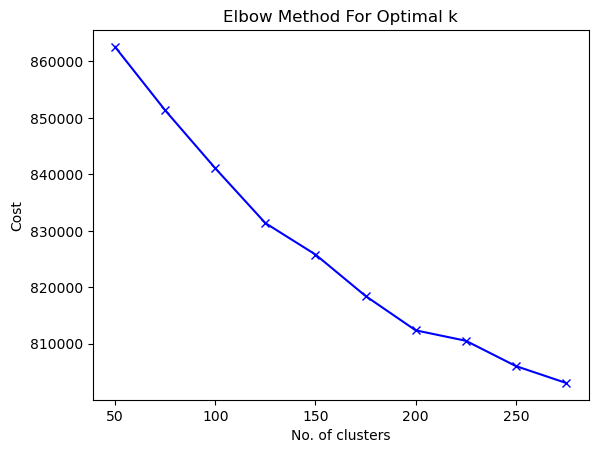

In [50]:
#Computing the optimal number of clusters using Elbow method
cost = []
K = range(50,300,25)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(selected_features)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# Building the model with 175 clusters
kmode = KModes(n_clusters=175, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9541, cost: 1241798.0
Run 1, iteration: 2/100, moves: 275, cost: 1241793.0
Run 1, iteration: 3/100, moves: 2, cost: 1241793.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9651, cost: 1242177.0
Run 2, iteration: 2/100, moves: 204, cost: 1242176.0
Run 2, iteration: 3/100, moves: 1, cost: 1242176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9150, cost: 1241213.0
Run 3, iteration: 2/100, moves: 198, cost: 1241207.0
Run 3, iteration: 3/100, moves: 3, cost: 1241207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8808, cost: 1243025.0
Run 4, iteration: 2/100, moves: 372, cost: 1243008.0
Run 4, iteration: 3/100, moves: 6, cost: 1243008.0
Init: initializing centroids
Init: initializing 

array([ 66, 116, 125, ...,  10,  29,  28], dtype=uint16)